In [41]:
import pandas as pd

# Diccionario que mapea el nombre del animal con su número
mapa_animales = {
    "Delfín": 0, "Ballena": 00, "Carnero": 1, "Toro": 2, "Ciempiés": 3, "Alacrán": 4,
    "León": 5, "Ranas": 6, "Perico": 7, "Ratón": 8, "Águila": 9, "Tigre": 10, "Gato": 11,
    "Caballo": 12, "Mono": 13, "Paloma": 14, "Zorro": 15, "Oso": 16, "Pavo": 17, "Burro": 18,
    "Chivo": 19, "Cochino": 20, "Gallo": 21, "Camello": 22, "Cebra": 23, "Iguana": 24, 
    "Gallina": 25, "Vaca": 26, "Perro": 27, "Zamuro": 28, "Elefante": 29, "Caimán": 30,
    "Lapa": 31, "Ardilla": 32, "Pescado": 33, "Venado": 34, "Jirafa": 35, "Culebra": 36,
    "Tortuga": 37, "Búfalo": 38, "Lechuza": 39, "Avispa": 40, "Canguro": 41, "Tucán": 42,
    "Mariposa": 43, "Chigüire": 44, "Garza": 45, "Puma": 46, "Pavo Real": 47, 
    "Puercoespín": 48, "Pereza": 49, "Canario": 50, "Pelícano": 51, "Pulpo": 52, 
    "Caracol": 53, "Grillo": 54, "Oso Hormiguero": 55, "Tiburón": 56, "Pato": 57, 
    "Hormiga": 58, "Pantera": 59, "Camaleón": 60, "Panda": 61, "Cachicamo": 62, 
    "Cangrejo": 63, "Gavilán": 64, "Araña": 65, "Lobo": 66, "Avestruz": 67, "Jaguar": 68, 
    "Conejo": 69, "Bisonte": 70, "Guacamaya": 71, "Gorila": 72, "Hipopótamo": 73, 
    "Turpial": 74, "Guácharo": 75
}

# Leer el archivo de resultados (se asume que el archivo está en el formato adecuado)
with open("resultados_guacharoactivo_2024.txt", "r", encoding="utf-8") as archivo:
    lineas = archivo.readlines()

# Procesar las líneas para extraer la información
datos = []
for linea in lineas:
    # Filtrar las líneas vacías o irrelevantes
    if linea.strip():
        partes = linea.strip().split(",")
        if len(partes) == 3:
            fecha, hora, animalito = partes
            # Homologar el número del animal según el diccionario
            numero = mapa_animales.get(animalito.strip(), None)
            if numero is not None:
                datos.append([fecha, hora, animalito.strip(), numero])

# Crear el DataFrame con los resultados
df_resultados = pd.DataFrame(datos, columns=["Fecha", "Hora", "Animalito", "Número"])

# Mostrar las primeras filas del DataFrame para verificar
print(df_resultados.head())

# Guardar el DataFrame a un archivo CSV
df_resultados.to_csv("resultados_guacharoactivo_completo.csv", index=False, encoding="utf-8")

print("Datos guardados exitosamente en resultados_guacharoactivo_completo.csv")


        Fecha       Hora Animalito  Número
0  2024-01-02   08:00 AM   Ballena       0
1  2024-01-03   08:00 AM   Pescado      33
2  2024-01-04   08:00 AM   Gallina      25
3  2024-01-05   08:00 AM      Lapa      31
4  2024-01-06   08:00 AM     Panda      61
Datos guardados exitosamente en resultados_guacharoactivo_completo.csv


In [42]:
df_resultados.count()

Fecha        12951
Hora         12951
Animalito    12951
Número       12951
dtype: int64

# RandomForestClassifier

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv("resultados_guacharoactivo_completo.csv")

# Limpiar los datos si es necesario, eliminando espacios adicionales en la columna 'Hora'
df['Hora'] = df['Hora'].str.strip()

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')

# Convertir la columna 'Hora' al formato adecuado (extraemos solo la hora en formato 24 horas)
df['Hora'] = pd.to_datetime(df['Hora'], format='%I:%M %p').dt.hour

# Definir las características (X) y la variable objetivo (y)
X = df[['Fecha', 'Hora', 'Número']]  # Usamos la fecha, hora y número como características
y = df['Animalito']  # El objetivo es predecir el nombre del animalito

# Convertir la fecha a un número (por ejemplo, número de días desde una fecha base)
# X['Fecha'] = (X['Fecha'] - X['Fecha'].min()).dt.days  # Convierte a días

X = X.copy()  # optional but ensures you're not modifying views
fecha_days = (X.iloc[:, 0] - X.iloc[:, 0].min()).dt.days
X.drop(columns=X.columns[0], inplace=True)  # drop original datetime
X.insert(0, 'Fecha', fecha_days)  # insert the numeric version in the same position


# Manejar valores NaN
# Eliminar filas con valores NaN (si los hubiera)
X = X.dropna()
y = y[X.index]  # Asegurarse de que `y` corresponda con `X` después de eliminar filas

map_based_on_dict = lambda text, mapping_dict: mapping_dict.get(text, text)  # Return the mapped value, or the original if not found
y = df['Animalito'].map(lambda name: map_based_on_dict(name, mapa_animales))


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [56]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluamos el modelo realizando una prediccion
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100)

Mean Squared Error: 0.0
R^2 Score: 1.0
Mean Absolute Error (MAE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0


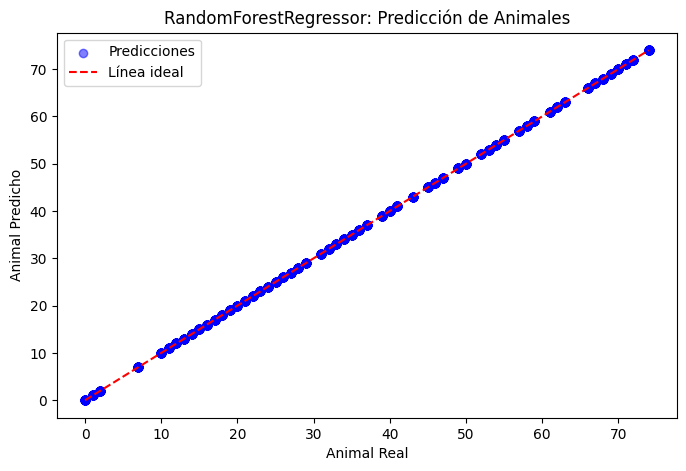

In [58]:
# Gráfico de Regresión, RandomForestRegressor
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicciones")
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle="--", label="Línea ideal")
plt.xlabel("Animal Real")
plt.ylabel("Animal Predicho")
plt.legend()
plt.title("RandomForestRegressor: Predicción de Animales")
plt.show()

In [ ]:
estimator_range = range(10, 310, 10)
accuracy_scores = []

X_sample = X.sample(frac=1, random_state=1)  
y_sample = y.loc[X_sample.index]

for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_sample, y_sample, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

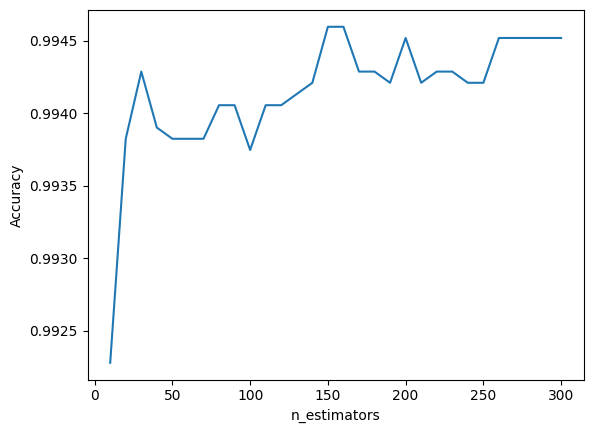

In [60]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [61]:
feature_cols = df.drop(['Animalito'], axis=1).columns

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(feature_cols)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

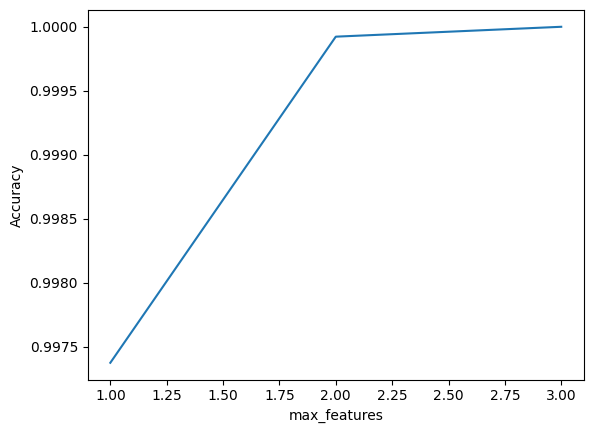

In [62]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [63]:
clf = RandomForestClassifier(n_estimators=150, max_features=3, random_state=1, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(max_features=3, n_estimators=150, n_jobs=-1,
                       random_state=1)

In [64]:
y_pred = clf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100, "%")

Mean Squared Error: 0.0
R^2 Score: 1.0
Mean Absolute Error (MAE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0 %


In [65]:
y_pred

array([26, 16, 32, ..., 13, 54, 15])

In [ ]:
# Mostrar las predicciones para los 12 sorteos del día siguiente
print(predicted_df)

[26. 16. 32. ... 13. 54. 15.]


# Redes reuronales

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np




2025-04-07 19:11:05.722225: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 19:11:05.725763: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 19:11:05.803566: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 19:11:05.833801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744071065.891115 1529677 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744071065.90